In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [10]:
df=pd.read_csv(r"C:\Users\shreyash\Downloads\Housing.csv")

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [15]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [16]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [17]:
df.mainroad.replace(['yes','no'],[1,0], inplace=True)

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished


In [20]:
df.guestroom.replace(['yes','no'],[1,0], inplace=True)

In [21]:
df.basement.replace(['yes','no'],[1,0], inplace=True)

In [23]:
df.hotwaterheating.replace(['yes','no'],[1,0], inplace=True)

In [24]:
df.airconditioning.replace(['yes','no'],[1,0], inplace=True)

In [25]:
df.prefarea.replace(['yes','no'],[1,0], inplace=True)

In [26]:
df.furnishingstatus.replace(['furnished','unfurnished','semi-furnished'],[1,0,2],inplace=True)

In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


<AxesSubplot:>

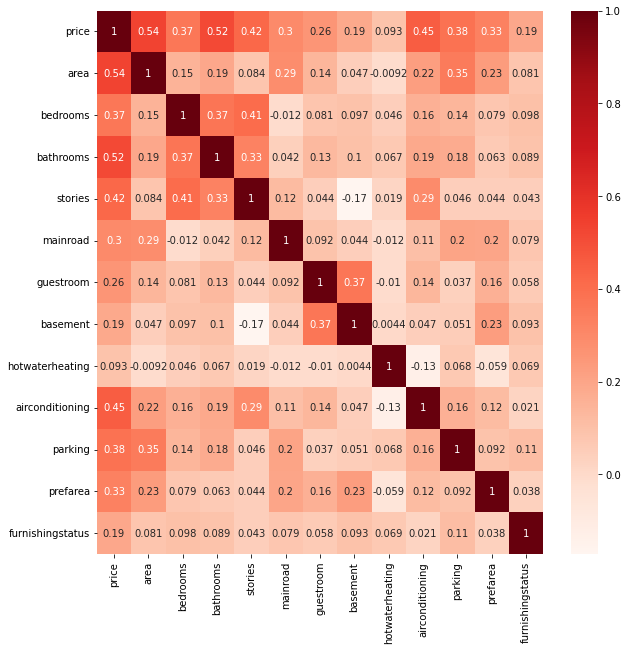

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Reds')

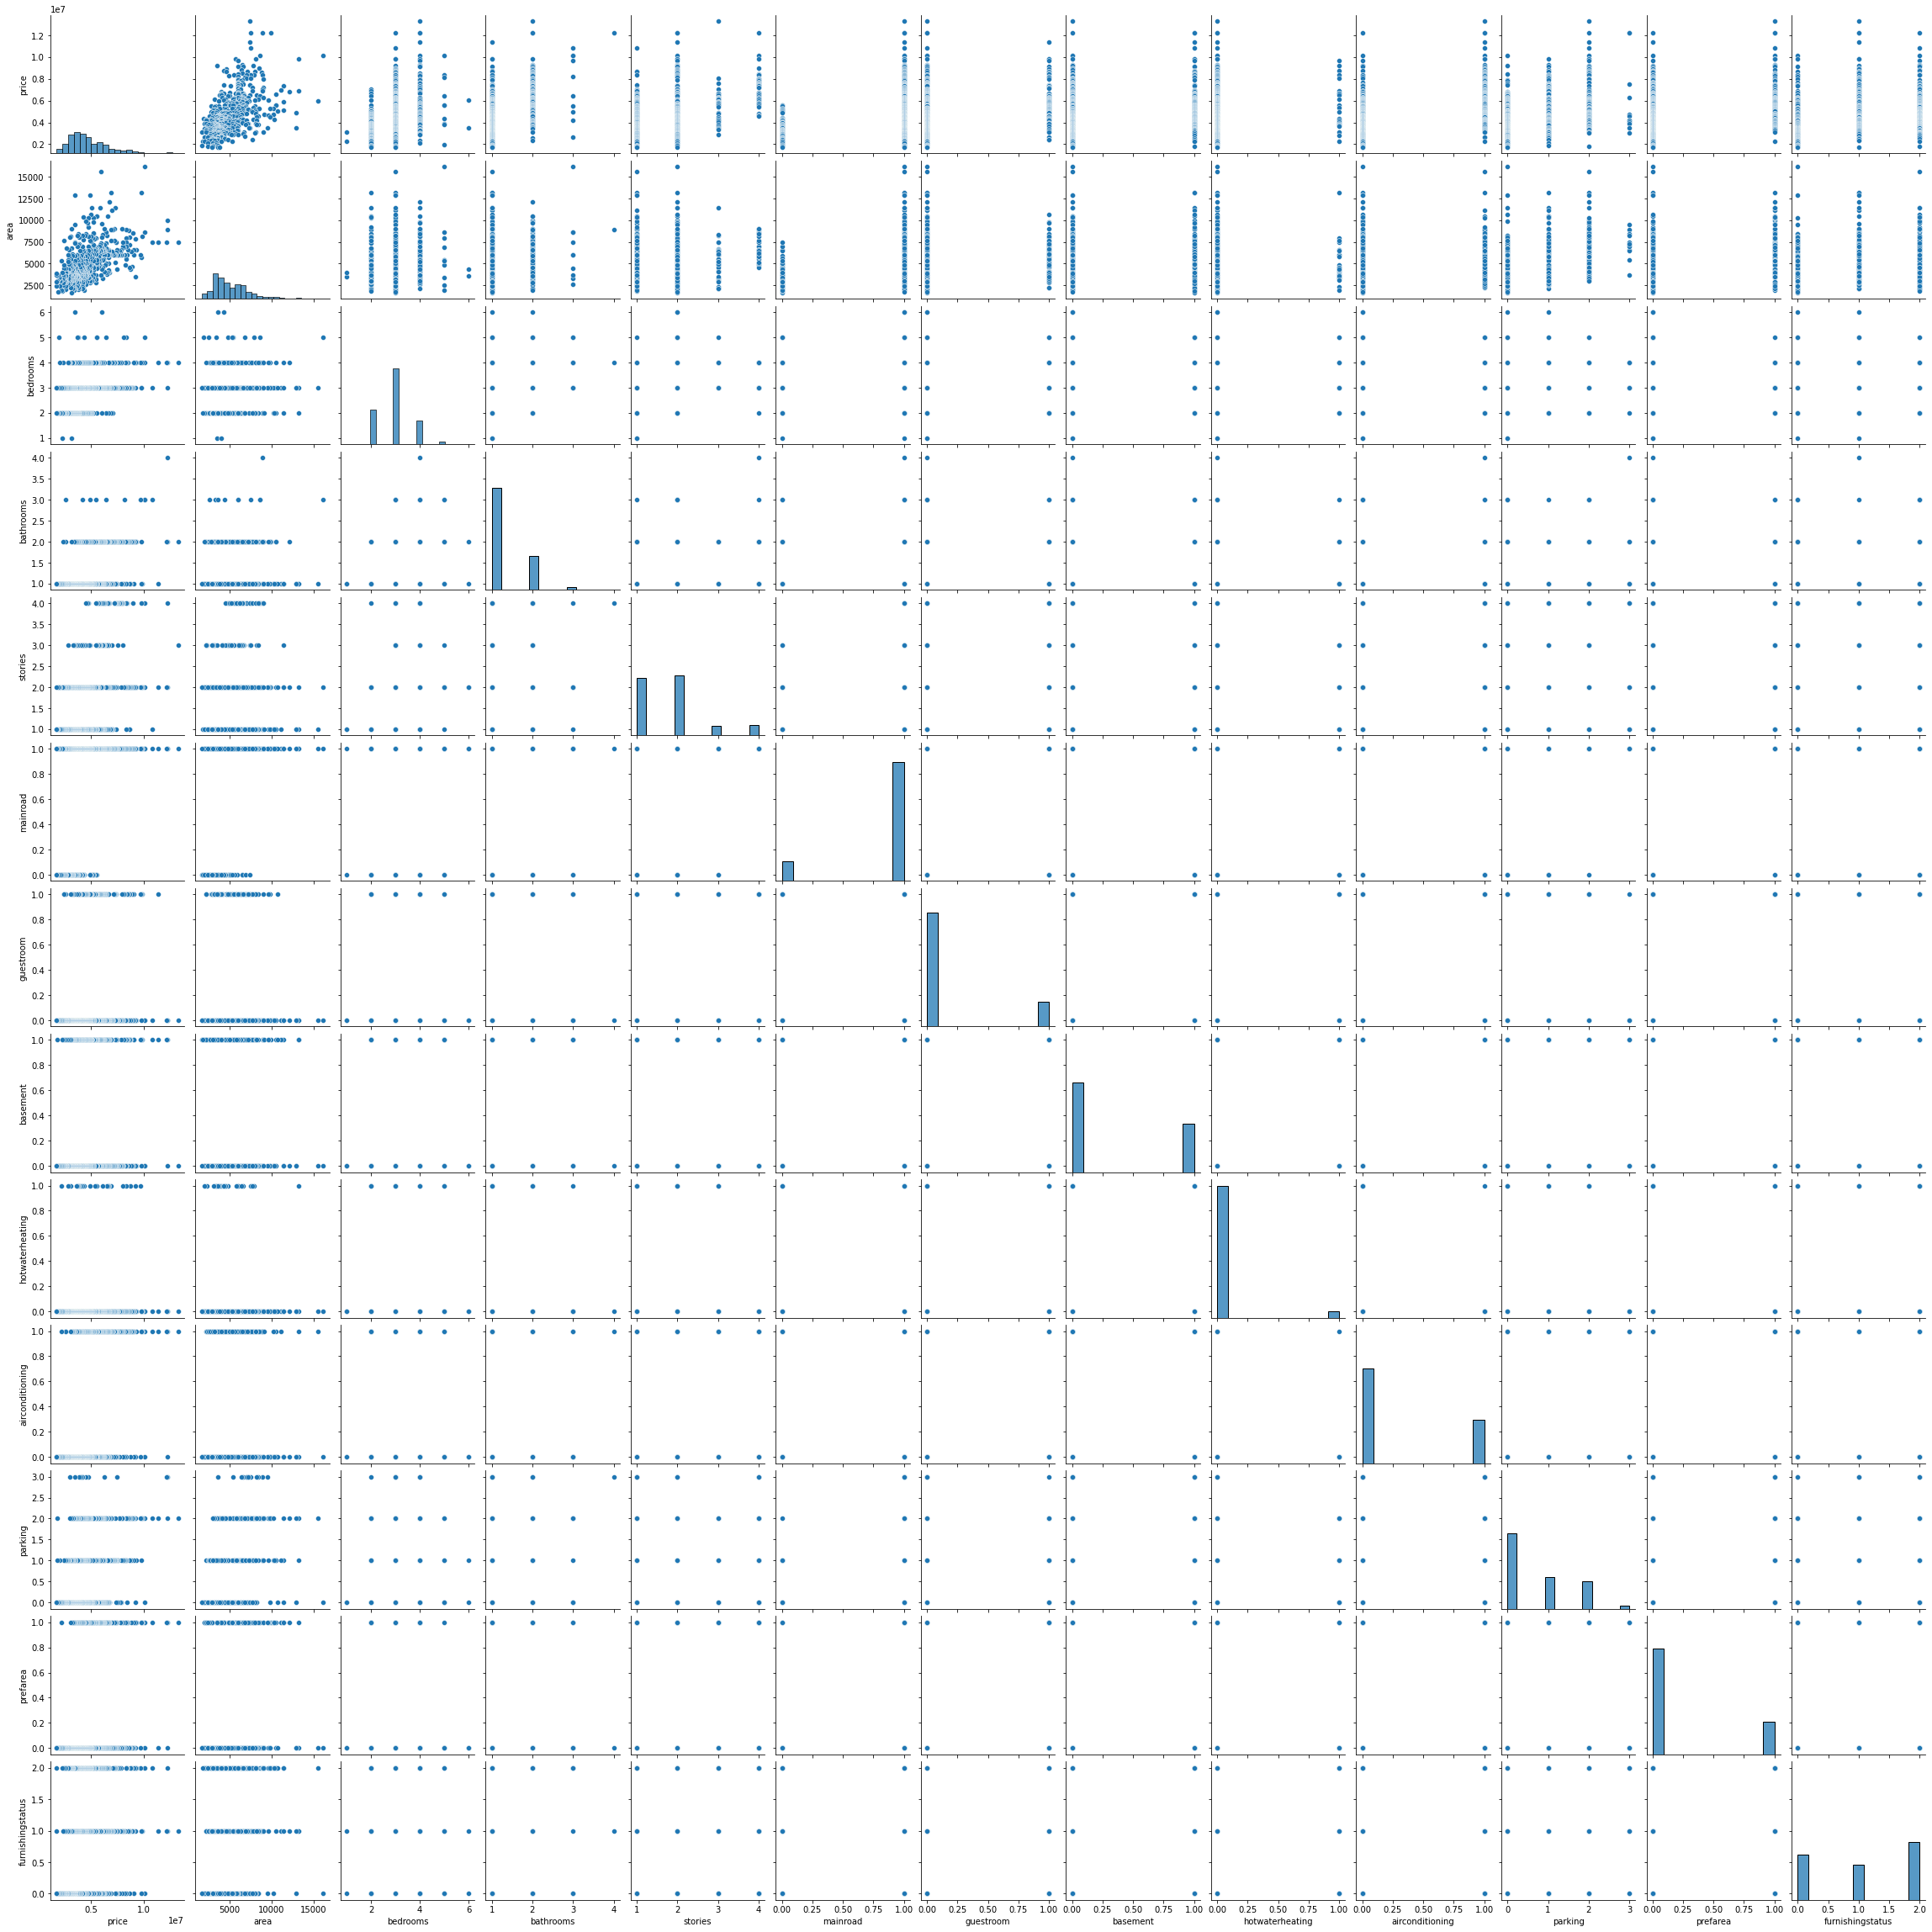

In [33]:
sns.pairplot(df)

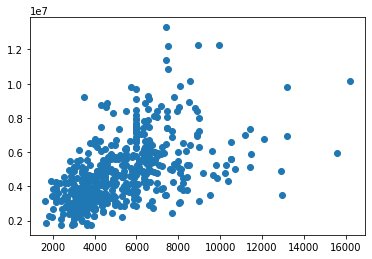

In [34]:
plt.scatter(df.area,df.price)

<AxesSubplot:>

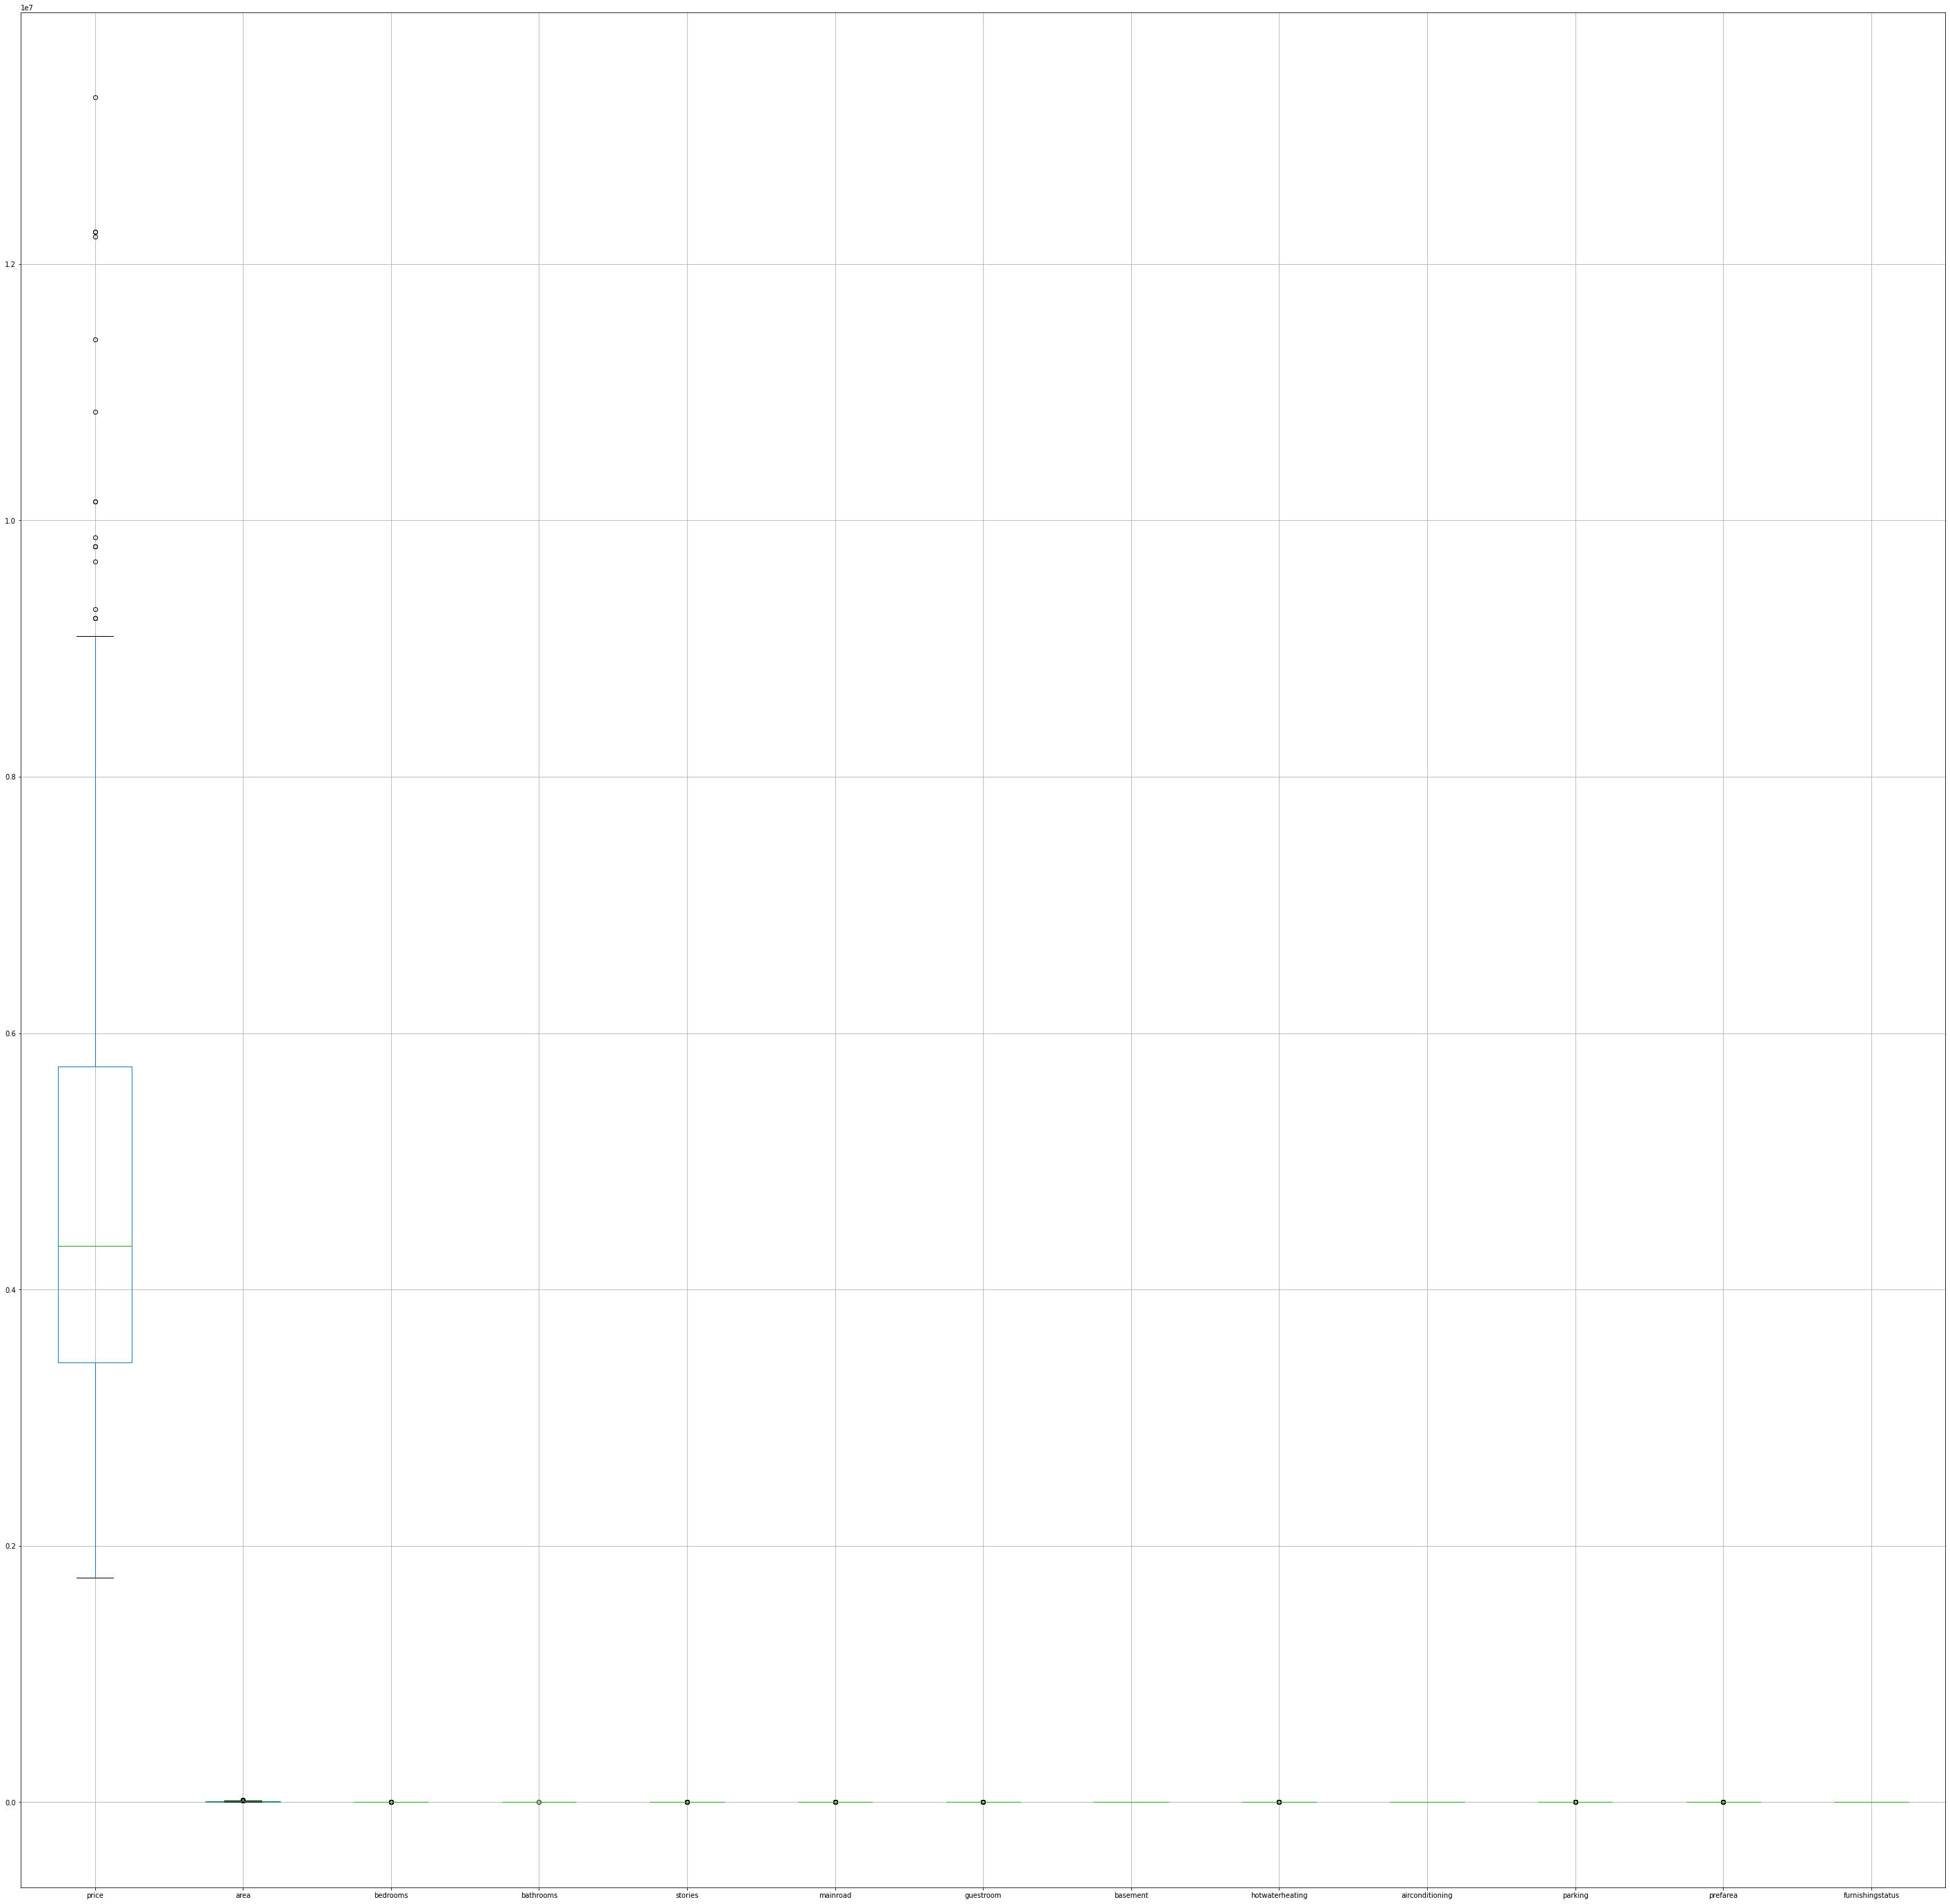

In [36]:
plt.figure(figsize=(50,50))
df.boxplot()

In [37]:
x=df.drop('price',axis=1)
y=df.price

In [38]:
df.price.ndim

1

In [46]:
df.drop('price',axis=1).ndim

2

In [48]:
df[df.columns[1:]]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,1


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [50]:
len(x_test)

109

In [51]:
len(x_train)

436

In [53]:
len(y_test)

109

In [52]:
len(y_train)

436

In [55]:
model=LinearRegression()

In [56]:
model.fit(x_train,y_train)

LinearRegression()

In [57]:
model.intercept_

-316304.92369929235

In [58]:
model.coef_

array([2.36584945e+02, 8.75039250e+04, 1.05038631e+06, 4.92993502e+05,
       4.48632766e+05, 3.34162274e+05, 4.85131512e+05, 9.34029711e+05,
       6.92778628e+05, 2.71330437e+05, 6.10471554e+05, 1.43822230e+05])

In [59]:
y_test

62     7070000
247    4550000
142    5600000
107    6125000
483    2940000
        ...   
201    4900000
92     6405000
66     6930000
284    4270000
187    5110000
Name: price, Length: 109, dtype: int64

In [60]:
y_pred=model.predict(x_test)

In [62]:
y_pred

array([6153324.51570999, 6306008.70992833, 6612219.98405263,
       5538684.84632079, 4283866.80237165, 2990065.76549733,
       2774110.66927713, 7239724.29624883, 2184684.31853654,
       4594560.74413212, 3814624.98390917, 3648409.96784583,
       4752592.79685558, 4564844.28377741, 5352970.68694654,
       7807290.24456715, 4386383.03056832, 3557869.63376263,
       6847973.60100643, 2714013.9672363 , 4645834.125767  ,
       5341791.3334509 , 5276318.40356853, 3507696.26217271,
       5146085.29473747, 7083731.31124417, 2831800.77500048,
       7175536.35808414, 7736692.56959959, 4185974.92392761,
       7419338.90573613, 6426455.67653752, 5038542.94709624,
       4571696.8082629 , 6140335.09507226, 4740117.59790948,
       6323249.60909273, 3449818.56045953, 5134871.23547124,
       5519729.17580968, 4024183.37950417, 3364870.67051545,
       3675782.11603016, 4670235.42192562, 6151686.8859458 ,
       3364991.52609013, 4884336.55213492, 2716752.78153076,
       2686323.7273427 ,

In [64]:
newdf=pd.DataFrame({'Actual Value':y_test, "Predicted Value":y_pred})

In [65]:
newdf

,Actual Value,Predicted Value
62,7070000,6.153325e+06
247,4550000,6.306009e+06
142,5600000,6.612220e+06
107,6125000,5.538685e+06
483,2940000,4.283867e+06
...,...,...
201,4900000,4.751112e+06
92,6405000,6.773957e+06
66,6930000,6.807951e+06
284,4270000,4.104133e+06


Text(0.5, 1.0, 'Actual V/s Predicted')

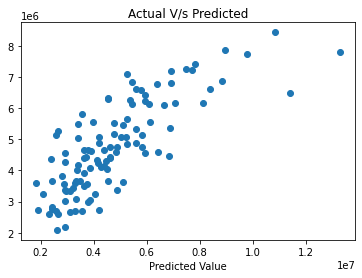

In [67]:
plt.scatter(newdf['Actual Value'],newdf['Predicted Value'])
plt.xlabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Actual V/s Predicted')




In [68]:
newdf.corr()

,Actual Value,Predicted Value
Actual Value,1.000000,0.791311
Predicted Value,0.791311,1.000000


<AxesSubplot:>

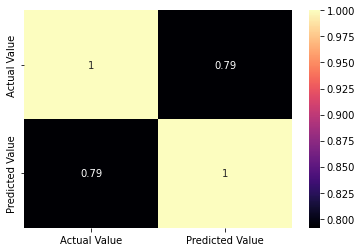

In [70]:
sns.heatmap(newdf.corr(),annot=True,cmap='magma')

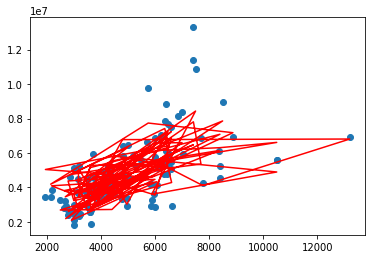

In [73]:
plt.scatter(x_test.area,y_test)
plt.plot(x_test.area,y_pred,color='red')

In [74]:
r2_score(y_test,y_pred)

0.6197581227208577